<a href="https://colab.research.google.com/github/AndreaArm/Ejercicio-1EDP/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 2 (3er ejercicio examen)

**Armendariz Hernandez Andrea**

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=0,\;\;\; \frac{\partial u(1,t)}{\partial x}=0, \;\;\;\;\; t>0$$
$$u(x,0)=f(x), \;\;\; 0<x<1$$
Para:
$$f(x)=\left\lbrace\begin{array}{c} -2 \;\; ~si\;\; 0<x\leq \frac{1}{2}\;\;\;\;  \\ 0 \; ~si \;\;\; \frac{1}{2}<x<1 \end{array}\right.$$

Esta dada en términos de la serie de Fourier por la expresión:

$$u(x,t)=-1 -\sum_{n=1}^{\infty} [\frac{4}{n\pi}\sin(\frac{n\pi}{2})] \cos(n\pi x)e^{-(n\pi)^2 t}.$$

Recordando que este problema modela la transferencia de calor en una barra ideal delgada, con  $k=1$ .

In [ ]:
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Graficamos la Condicion Inicial

In [ ]:
def fun(x):
  y =zeros(len(x))
  for i in range(len(x)):
    y[i]=-2
  return y
def gun(x):
  y =zeros(len(x))
  for i in range(len(x)):
    y[i]=0
  return y

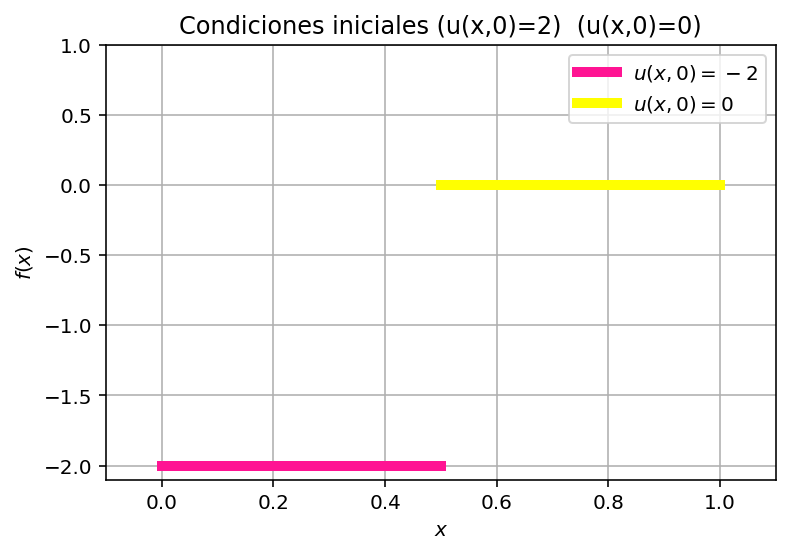

In [ ]:
x= linspace(0,1,1000)
a1=[]
a2=[]
for i in range(len(x)):
  if(x[i]<=0.5):
    a1.append(x[i])
  else:
    a2.append(x[i])
f=fun(a1)
g=gun(a2)
plt.plot(a1,f,label='$u(x,0)=-2$', color='deeppink', linewidth=5)
plt.plot(a2,g,label='$u(x,0)=0$', color='yellow', linewidth=5)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condiciones iniciales (u(x,0)=2)  (u(x,0)=0)")
xlim([-0.1,1.1]),ylim([-2.1,1.0]),grid(),legend()
show()

Utilizamos Serie de Fourier para aproximar la condición inicial $u(x,t)=-2,   u(x,t)=0$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    r = zeros(len(x))
    for n in range(1,N):
        f += ((4/n*pi)*sin(n*pi/2)*(cos(n*pi*x))) 
    r=-1-f
    return r

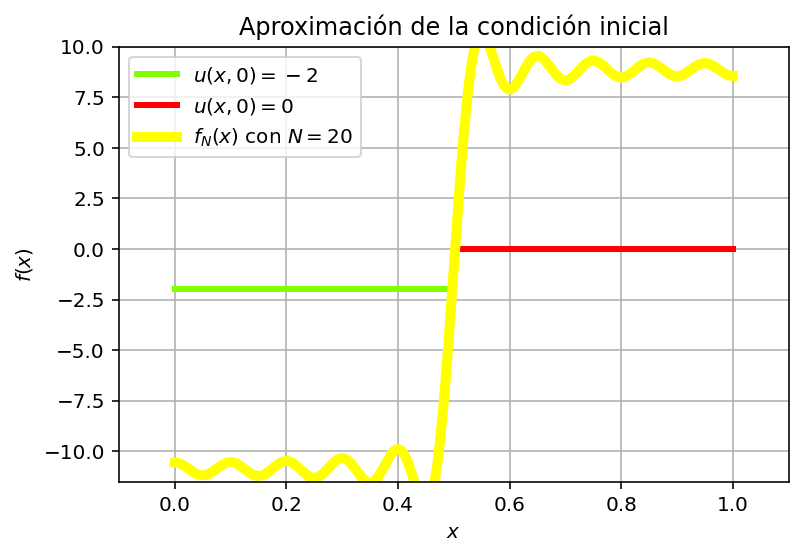

In [ ]:
f_n = u_0(x)
plt.plot(a1,f,label='$u(x,0)=-2$', color='chartreuse', linewidth=3)
plt.plot(a2,g,label='$u(x,0)=0$', color='red', linewidth=3)
plot(x,f_n,label='$f_N(x)$ con $N=20$', color='yellow', linewidth=5)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-11.5,10.0]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

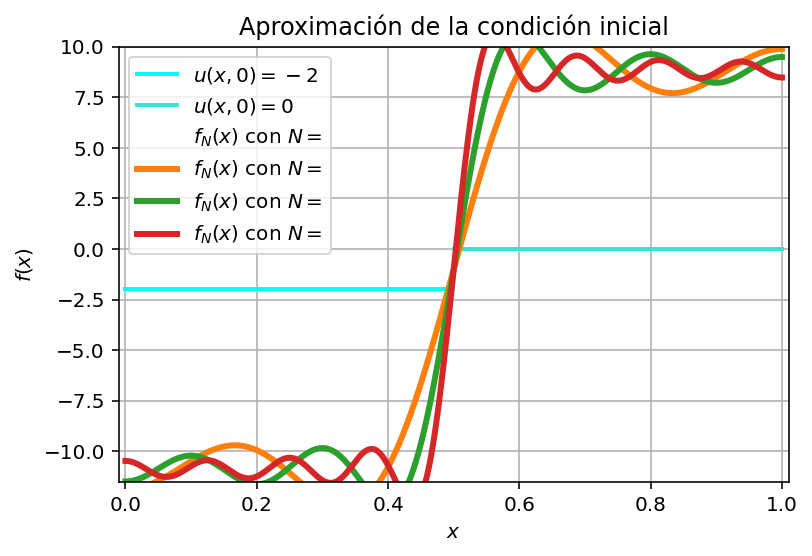

In [ ]:
plt.plot(a1,f,label='$u(x,0)=-2$',color='aqua', linewidth=2)
plot(a2,g,label='$u(x,0)=0$',color='turquoise', linewidth=2)
for i in range(1,20,5):
    plt.plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$', linewidth=3 %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-11.5,10.0]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial,  t=0 .

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    r = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += ((4/n*pi)*sin(n*pi/2)*(cos(n*pi*x)))*exp(-n**2*pi**2*t[i])
    r= -1-f
    return r

In [ ]:
xp = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

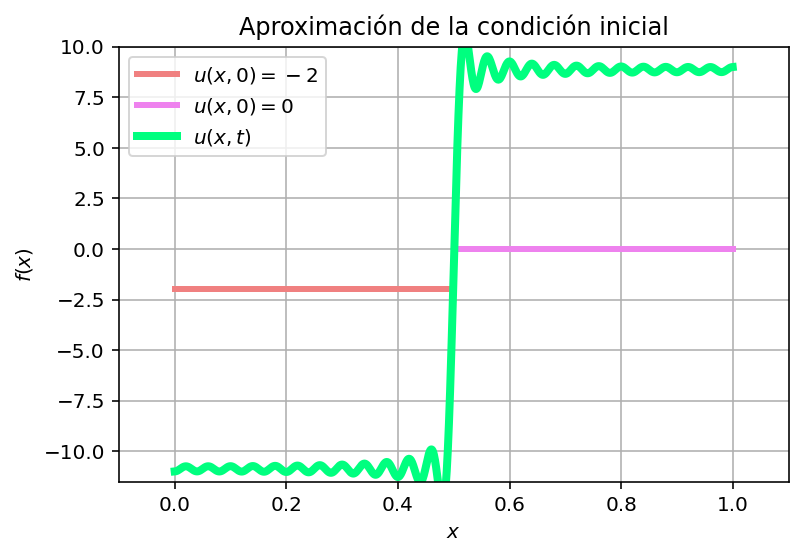

In [ ]:
plt.plot(a1,f,label='$u(x,0)=-2$', color='lightcoral', linewidth=3)
plt.plot(a2,g,label='$u(x,0)=0$',color='violet', linewidth=3)
plt.plot(xp,U[:,0],label='$u(x,t)$', color='springgreen', linewidth=4)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-11.5,10.0]),grid(),legend()
show()

Observamos como va evolucionando  cuando  $t→∞$ .

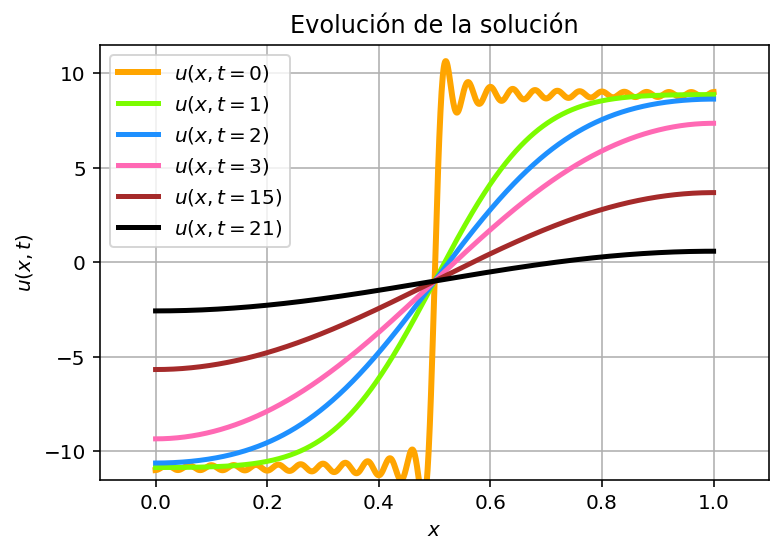

In [ ]:
plt.plot(x,U[:,0],label='$u(x,t=0)$', color='orange', linewidth=3, linestyle='solid') 
plt.plot(x,U[:,1],label='$u(x,t=1)$',color='lawngreen', linewidth=2.5)
plt.plot(x,U[:,2],label='$u(x,t=2)$', color='dodgerblue', linewidth=2.5)
plt.plot(x,U[:,4],label='$u(x,t=3)$',color='hotpink', linewidth=2.5)
plt.plot(x,U[:,10],label='$u(x,t=15)$',color='brown', linewidth=2.5)
plt.plot(x,U[:,21],label='$u(x,t=21)$', color='black', linewidth=2.5)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.1,1.1]),ylim([-11.5,11.5]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

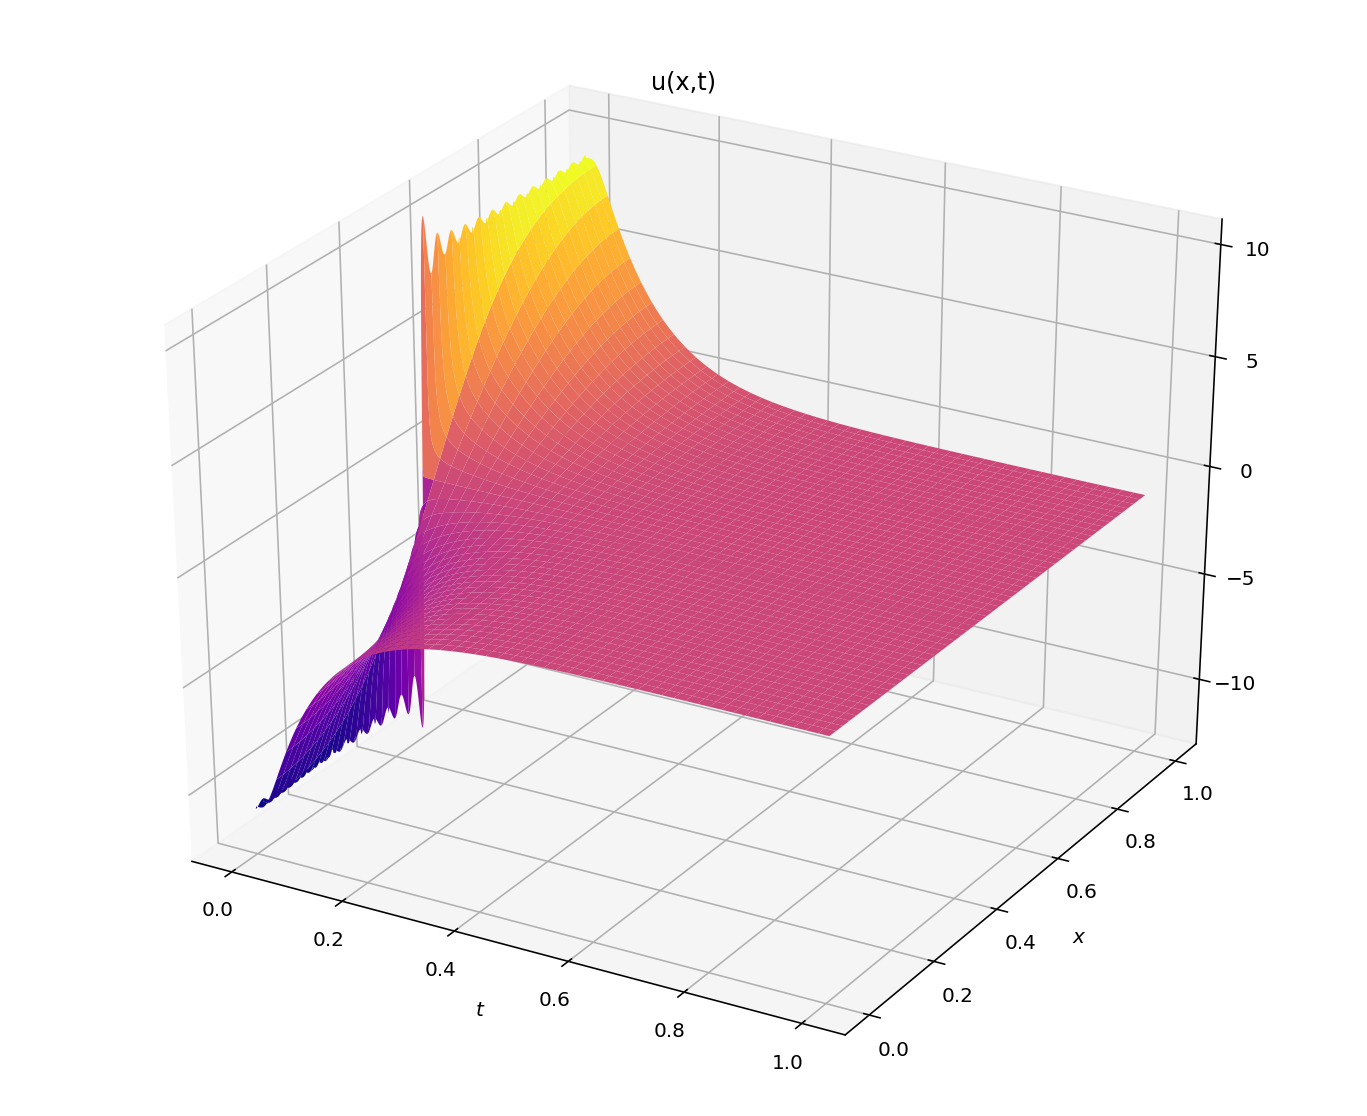

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"hotpink", "deeppink", "plasma"